# SMAC/CRISTAL/ULille

Auteur : Philippe Mathieu, CRISTAL Lab, SMAC Team, University of Lille, email : philippe.mathieu@univ-lille.fr

Date : 13 march 2020

## Simulation of epidemics

# An exponential phenomenon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

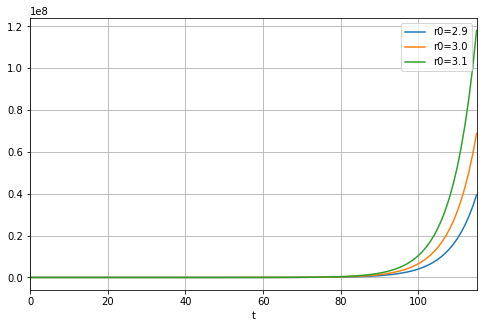

In [2]:
# Une personne infecte r0 personnes toutes les d unités de temps 
def f(x,r0) :
    return np.round(r0**(x/d),2)

d=7
t=np.arange(0,116)
df = pd.DataFrame()
df['t']=t
for r0 in [2.9 , 3.0 , 3.1] :
    name='r0='+str(r0)
    df[name]=f(t,r0)

# pd.options.display.float_format = '{:10,.5f}'.format
fig, ax = plt.subplots(figsize=(8,5))
df.plot(x='t', ax=ax, kind='line', grid=True)

plt.show()
# plt.savefig('exponentielle.png', bbox_inches='tight')

In [3]:
d=1
# Si chaque personne en contamine 3 chaque jour, au bout de 12 jours combien sont contaminés ?
print(f(12,3))
# Si on divise R par 2 (donc R0=1.5), combien obtient-on cette fois ci ?
print(f(12,1.5))

531441.0
129.75


# The continuous approach

Montrer ici ce qu'on "sait" faire avec scipy mais aussi ce qu'on ne sait pas faire !

# The discreet approach

## A really basic SIR model using percentages

On utilise uniquement deux taux qui sont constants tout au long de l'expérience.

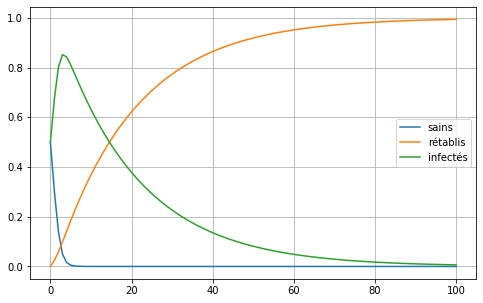

In [6]:
tauxTransmiss=0.8  # beta
tauxRemis=0.05    # gamma

I=[0.5]
S=[0.5]
R=[0.0]

import matplotlib.pyplot as plt

for j in range(100):
    nouveauxCas = tauxTransmiss*S[-1]*I[-1]
    nouveauxRemis=tauxRemis*I[-1]
    #
    S.append(S[-1]-nouveauxCas) 
    R.append(R[-1]+nouveauxRemis)
    I.append(I[-1]+nouveauxCas-nouveauxRemis)
    assert(round(S[-1]+I[-1]+R[-1],3) == 1) # la somme fait toujours 1

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(S,label="sains")
plt.plot(R,label="rétablis")
plt.plot(I,label="infectés")
plt.legend(loc="best")
plt.grid()
plt.show()

# 0.8 0.05
#plt.savefig('fig1_sir_pessimiste.png', bbox_inches='tight')

# 0.2 0.09
#plt.savefig('fig2_sir_optimiste.png', bbox_inches='tight')


On obtient la courbe classique de tous les papiers sur le sujet

Dans ces équations classiques il n'y a que 3 compartiments, mais surtout tout est linéarisé ! c'est clairement trop simple: ne serait-ce que modéliser gamma par 1/duree

# SIR avec phases de confinement

On conserve le modèle à 3 boites, mais cette fois on passe une liste de taux de transmission.
De cette manière il devient facile de modéliser différentes phases dans le processus et notamment des phases de confinement.

In [2]:
def SIR_increment(I, S, R, liste_tauxTransmiss, tauxRemis):
    population = I[0] + S[0] + G[0]
    for tauxTransmiss in liste_tauxTransmiss:
        nouveauxCas = tauxTransmiss*S[-1]*I[-1]/np.maximum(1, population)
        nouveauxRemis = tauxRemis*I[-1]
        #
        S.append(S[-1]-nouveauxCas) 
        R.append(R[-1]+nouveauxRemis)
        I.append(I[-1]+nouveauxCas-nouveauxRemis)
        assert(round(S[-1]+I[-1]+R[-1],3) == population) # la somme fait toujours 1
    return None

Part initiale de la population infectée :

In [17]:
I=[0.0005 * 1000000]
S=[0.9995 * 1000000]
R=[0.0]

Evolution du taux de transmission:

In [18]:
p_1 = [0.8] * 10 # Avant confinement
p_2 = np.linspace(0.8,0.01, 5) # Debut du confinement
p_3 = [0.01] * 10 # Confinement
p_4 = np.linspace(0.01,0.5, 5) # Relachement du confinement
p_5 = [0.5] * 10 # Retour à la normale avec gestes barrières
p_6 = np.linspace(0.5,0.01, 5) # Retour au confinement
p_7 = [0.01] * 10 # Confinement
liste_tauxTransmiss = np.concatenate([p_1, p_2, p_3, p_4, p_5, p_6, p_7])

On lance l'épidémie avec une durée de guérison de 6-7 jours:

In [19]:
SIR_increment(I, S, R, liste_tauxTransmiss, 0.15)

On trace le graphe.

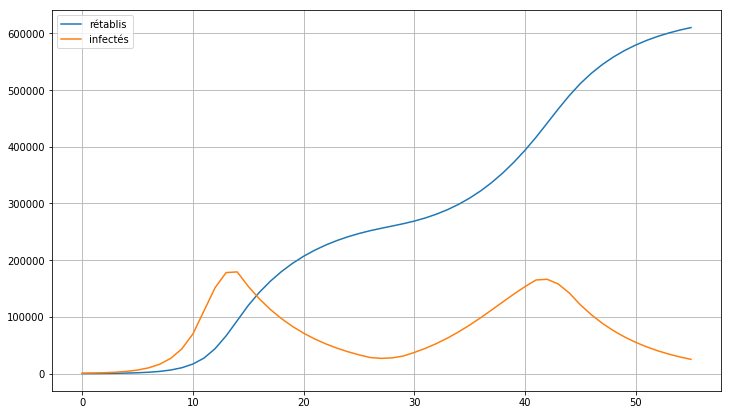

In [20]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(R,label="rétablis")
plt.plot(I,label="infectés")
plt.legend(loc="best")
plt.grid()

## The same model but with integer data and real dates

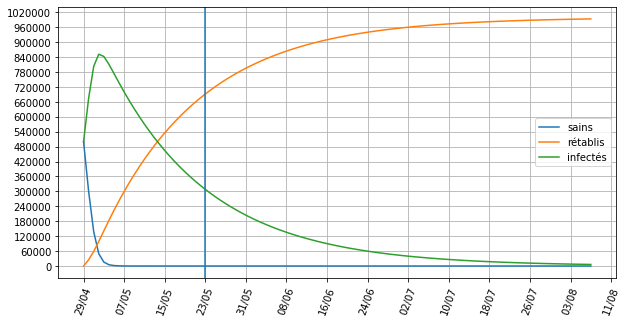

In [20]:
# si on souhaite gérer de vraies dates
import matplotlib.dates as mdates
import datetime
#debut=datetime.date(2020,3,15)         # date de début de l'épidémie
debut=datetime.date.today()
unjour=datetime.timedelta(days=1)      # interval de 1j 

pop=1000000
tauxTransmiss=0.8  # beta
tauxGueris=0.05    # gamma

I=[pop/2]
S=[pop/2]
R=[0]

import matplotlib.pyplot as plt

for j in range(100):
    # le changement est ici : on divise par la pop pour avoir un pourcentage
    nouveauxCas = round(tauxTransmiss*S[-1]*I[-1]/pop)
    nouveauxGueris= round(tauxGueris*I[-1])
    #assert nouveauxCas>=1 , "S={} I={} nouveauxCas={}".format(S[-1],I[-1],nouveauxCas)
    #assert nouveauxGueris>=1 , "S={} I={} nouveauxGueris={}".format(S[-1],I[-1],nouveauxGueris)
    #print("{}\t\t{}\t\t{}\t\t{}\t\t{}".format(S[-1],I[-1],R[-1],nouveauxCas,nouveauxGueris))
    #
    S.append(S[-1]-nouveauxCas) 
    R.append(R[-1]+nouveauxGueris)
    I.append(I[-1]+nouveauxCas-nouveauxGueris)
    assert(S[-1]+I[-1]+R[-1] == pop) # la somme fait toujours pop
    
fig, ax = plt.subplots(figsize=(10,5))
# gestion des dates
plt.xticks(rotation=70)      # incliner les x pour les dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
#ax.xaxis.set_major_locator(mdates.DayLocator()) # jouer sur le nombre de ticks en x et y
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) 
ax.yaxis.set_major_locator(plt.MaxNLocator(20))
jours=[]
for j in range(0,len(S)): jours.append(debut+datetime.timedelta(j))

plt.plot(jours,S,label="sains")
plt.plot(jours,R,label="rétablis")
plt.plot(jours,I,label="infectés")
plt.axvline(x="2020-05-23")
plt.legend(loc="best")
plt.grid()
plt.show()

# 0.8 0.05
#plt.savefig('fig1_sir_pessimiste.png', bbox_inches='tight')

# 0.2 0.09
#plt.savefig('fig2_sir_optimiste.png', bbox_inches='tight')


Super ... on obtient exactement la même chose que précédemment.

L'avantage maintenant, c'est que l'on peut facilement voir ce que ça donne à partir d'1 seul infecté

## Quelques essais pour jouer sur les contacts
On reprend ici même modèle, mais sans les dates (qui rendent la lecture imprecise)
R0 = contacts * duree * tauxTransmiss

On sait que duree=14 et que R0 compris entre 2.2 et 2.6

par ailleurs, le taux de guerison est égal dans les modèles théoriques, à 1/duree

In [ ]:
pop=1000000

r0=2.2
duree=7
contacts=15
tauxTransmiss=0.8 #r0/(duree*contacts)
print("r0={:.2f}, tauxtransmiss={:.4f}".format(r0,tauxTransmiss))

I=[1]
S=[pop-1]
R=[0]

import matplotlib.pyplot as plt

for j in range(80):
    # le changement est ici : on divise par la pop pour avoir un pourcentage
    nouveauxCas = (tauxTransmiss*S[-1]*I[-1]/pop)
    nouveauxGueris= ((1/duree)*I[-1])
    #assert nouveauxCas>=1 , "S={} I={} nouveauxCas={}".format(S[-1],I[-1],nouveauxCas)
    #assert nouveauxGueris>=1 , "S={} I={} nouveauxGueris={}".format(S[-1],I[-1],nouveauxGueris)
    #print("{}\t\t{}\t\t{}\t\t{}\t\t{}".format(S[-1],I[-1],R[-1],nouveauxCas,nouveauxGueris))
    #
    S.append(S[-1]-nouveauxCas) 
    R.append(R[-1]+nouveauxGueris)
    I.append(I[-1]+nouveauxCas-nouveauxGueris)
    #assert(S[-1]+I[-1]+R[-1] == pop) # la somme fait toujours pop
    
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(S,label="sains")
plt.plot(R,label="rétablis")
plt.plot(I,label="infectés")
plt.legend(loc="best")
plt.grid()
plt.show()

Ben là ça déconne grave .... ça ne monte pas si mon taux est inférieur à 0.2

par ailleurs, pourquoi j'ai 500000 rétablis avec très peu d'infectés

par ailleurs comment on illustre l'immunité collective ?

# Un modèle SIRM en pourcentage

In [ ]:
tauxTransmiss=0.8   # les contacts
tauxMortalite=0.005  # taux gueris = 1/tauxMortalite
tauxGuerison=0.05

I=[0.5]
S=[0.5]
R=[0.0]
M=[0.0]

import matplotlib.pyplot as plt

for j in range(100):
    nouveauxCas = tauxTransmiss*S[-1]*I[-1]
    nouveauxGueris=tauxGuerison*I[-1]
    nouveauxDeces=tauxMortalite*I[-1]
    # On passe de S -> I -> (R ou M)
    S.append(S[-1]-nouveauxCas) 
    I.append(I[-1]+nouveauxCas-nouveauxGueris-nouveauxDeces)
    R.append(R[-1]+nouveauxGueris)
    M.append(M[-1]+nouveauxDeces) 
    assert(round(S[-1]+I[-1]+R[-1]+M[-1],3) == 1) # la somme fait toujours 1

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(S,label="sains")
plt.plot(R,label="remis")
plt.plot(I,label="infectes")
plt.plot(M,label="morts")
plt.legend(loc="best")
plt.grid()
plt.show()


# SIRM + contacts + données entieres et dates + confinement

In [ ]:
import numpy

# si on souhaite gérer de vraies dates
import datetime
debut=datetime.date(2020,3,15)         # date de début de l'épidémie
unjour=datetime.timedelta(days=1)      # interval de 1j 

pop=1000000
tauxTransmissDeconf = 0.8
tauxTransmissConf  = tauxTransmissDeconf/100
tauxTransmiss = tauxTransmissDeconf # On commence en déconfinement
periods = [18,90]

tauxMortalite=0.005
tauxGueris=0.05

I=[1]
S=[pop-1]
R=[0]
M=[0]

import matplotlib.pyplot as plt

for j in range(1,500):
#while I[-1] > 0.001 :
    # Changement de période
    if (j in periods) :
        if (tauxTransmiss == tauxTransmissConf) : 
            tauxTransmiss=tauxTransmissDeconf
        else : tauxTransmiss=tauxTransmissConf
        print(str(j)+" changement de periode : "+str(tauxTransmiss))

    nouveauxCas = tauxTransmiss*S[-1]*I[-1]/pop
    nouveauxGueris=tauxGueris*I[-1]
    nouveauxDeces=tauxMortalite*I[-1]    # taux mortalité = 1-tauxGueris  ???
    # On passe de S -> I -> (R ou M)
    S.append(S[-1]-nouveauxCas) 
    I.append(I[-1]+nouveauxCas-nouveauxGueris-nouveauxDeces)
    R.append(R[-1]+nouveauxGueris)
    M.append(M[-1]+nouveauxDeces) 
    #assert(round(S[-1]+I[-1]+R[-1]+M[-1],3) == 1) # la somme fait toujours 1

print("L'épidémie aura duré "+str(len(S))+" jour ,et termine avec "+str(round(M[-1],2))+" morts")

jours=[]
for j in range(0,len(S)): jours.append(debut+datetime.timedelta(j))
    
fig, ax = plt.subplots(figsize=(12,6))
plt.xticks(rotation=70)      # incliner les x pour les dates
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#ax.xaxis.set_major_locator(mdates.DayLocator()) # jouer sur le nombre de ticks en x et y
# ax.xaxis.set_major_locator(plt.MaxNLocator(5)) 
ax.yaxis.set_major_locator(plt.MaxNLocator(20))

#plt.plot(jours,S,label="sains")  # [s*pop for s in S]
#plt.plot(jours,R,label="remis")
plt.plot(jours,I,label="infectes")
plt.plot(jours,M,label="morts")
#plt.axvline(x='2020/05/01', color='black', linewidth=1, linestyle=(0, (5,10)))
#plt.axhline(y=100000, color='black', linewidth=1, linestyle=(0, (5,10)))

plt.legend(loc="best")
plt.grid()
plt.show()
#plt.savefig("plot.png")

import pandas as pd
# pd.options.display.float_format = '{:10,.5f}'.format   # pour éviter la notation scientifique

df = pd.DataFrame()
df['S']=S
df['I']=I
df['R']=R
df['M']=M
df['somme']=df['S']+df['I']+df['R']+df['M']
print(df)


# L'approche Louapre

Ici il calcule principament des malades : les sains sont calculés par différence entre pop et ce qui reste

In [ ]:
import math

pop=70000000.0
contacts=25            # sur la totalité de la maladie
duree=10
tauxTransmiss=0.25/100   # pour 1 contact
tauxMortalite=3.0/100      # sur la totalité de la maladie

print("R0={}".format(nbContacts*tauxTransmiss*duree))

malades=[2000]  # malades sur la periode
remis=[200]     # remis sur la periode
morts=[50]      # morts sur la periode
sains=[pop-malades[-1]-remis[-1]-morts[-1]]


for j in range(1,180): # 3 mois
    nouveauxMalades = (malades[-1]*contacts*tauxTransmiss*(sains[-1]/pop))
    nouveauxRemis   = (malades[-1]*(1/duree))
    nouveauxMorts   = (malades[-1]*(tauxMortalite/duree))
    #
    malades.append(malades[-1]+nouveauxMalades-nouveauxRemis-nouveauxMorts)
    remis.append(remis[-1]+nouveauxRemis)
    morts.append(morts[-1]+nouveauxMorts)
    sains.append(pop-malades[-1]-remis[-1]-morts[-1])
    assert(sains[-1]+malades[-1]+remis[-1]+morts[-1]==pop)

print("Nombre de morts = {:6.2f}".format(morts[-1]))
import pandas as pd
df = pd.DataFrame()
df['S']=sains
df['M']=malades
df['R']=remis
df['Morts']=morts
pd.options.display.float_format = '{:6.1f}'.format
print(df)

plt.figure(figsize=(10,5))
#plt.plot(sains,label="sains")  # [s*pop for s in S]
plt.plot(remis,label="remis")
plt.plot(malades,label="infectes")
plt.plot(morts,label="morts")
plt.show()

Il part du principe que les sains sont à chaque t , calculés par soustractions des autres boites à partir de la population total (sains=pop-malades-remis-morts).

Au bout du compte en quoi c'est vraiment différent des approches du dessus ?

# Une autre approche plus réaliste

Celle de christian rabaud

ici , quand on calcule les morts, qui sont dans cet état après 15j d'état grave, on va chercher la valeur à t-15
Selon moi, c'est nettement plus réalise


le bout de code ci-dessous ne fonctionne pas encore vraiment

In [ ]:
# Modele de Christian Rabaux

import matplotlib.pyplot as plt

# parametres
pop=612056+369641; # taille de la population
r0=2.3;            # taux de contagion
r0c=0.8;           # taux de contagion en confinement
jc=48;   # delai entre jO et confinement
taux_cg=0.05;      # taux de cas graves
taux_g=0.81;       # taux de guerison
taux_dc=0.5;       # taux de deces hospitaliers
dscg=9;            # duree de sejour cas graves
dacv=9;            # duree apparition d'un cas grave
capa_rea=167;      # capacite de rea en lits

# donnees initiales
jour=[0];
nouveaux_cas=[1.0];
nouveaux_cas_graves=[0.0];
cas_graves_cumules=[0.0];
occupation_rea=[0];
nouveaux_gueris=[0];
nouveaux_morts_hospitaliers=[0];
morts_hospitaliers_cumules=[0];
nombre_total_de_cas=[0];
gueris_cumules=[0];
effet_confinement=[0];
capa=[capa_rea]
depassement_capa=[True];
dix_rea=[0];

# evolution
for i in range(1,3) :
    jour.append(jour[-1]+3)
    if (jour[-1]>=6):
        # calcul ncduj
        if (effet_confinement[-1]>0):
            ncduj = effet_confinement[-1]
        elif (((pop-gueris_cumules[-1])*0.6)-nombre_total_de_cas[-1])<0 :
            ncduj=0
        else : ncduj = (nouveaux_cas[-1]*R0)*(((((pop-gueris_cumules[0]))*0.6)-nombre_total_de_cas[-1])/(((pop-gueris_cumules[-1]))*0.6))
        nouveaux_cas.append((ncduj+nouveaux_cas[-1])/2.0) # la moyenne pour remplir cette case
        nouveaux_cas.append(ncdj)
        nombre_total_de_cas.append(nombre_total_de_cas[-1]+nouveaux_cas[-1])
        
    if (jour[-1]>=9):
        nouveaux_cas_graves.append(nouveaux_cas[-3]*taux_cg) # A partir du jour 9
        cas_graves_cumules.append(cas_graves_cumules[-1]+nouveaux_cas_graves[-1])
        occupation_rea.append(occupation_rea[-1]+nouveaux_cas_graves[-1])
        nouveaux_gueris.append(nouveaux_cas[-3]*taux_g)
        gueris_cumules.append(gueris_cumules[-1]+nouveaux_gueris[-1])
    
    if (jour[-1]>=15):
        nouveaux_morts_hospitaliers.append(nouveaux_cas_graves[-2]*taux_dc)
        morts_hospitaliers_cumules.append(morts_hospitaliers_cumules[-1]+nouveaux_morts_hospitaliers[-1])
    
    if (pop*0.6 - nombre_total_de_cas[-2]) < 0 :
        effet_confinement.append(0)
    elif (jc+7-jour[-1]>0) :
        effet_confinement.append(0)
    else : effect_confinement.append((((nouveaux_cas[-2]+nouveaux_cas[-3])/2.0)*R0c)*((((pop)*0.6)-nombre_total_de_cas[-2])/((pop)*0.6)))

    capa.append(capa_rea)
    depassement_capa.append(capa[-1<occupation_rea[-1]])
    dix_rea.append(cas_graves_cumules[-1]>10)

plt.plot(capa,label="capa")
plt.plot(morts_hospitaliers_cumules,label="morts_hospitaliers_cumules")
plt.plot(nouveaux_morts_hospitaliers,label="nouveaux_morts_hospitalier")
plt.plot(occupation_rea,label="occupation_rea")
plt.plot(nouveaux_cas_graves,label="nouveaux_cas_graves")

plt.legend(loc="best")
plt.show()



# Un modèle S-I-(G/R)-M

Les infectés se répartissent en Graves et Remis (somme de ces deux taux sensiblement équivalent aux remis de l'ancien modèle). Les Graves finissent soit Remis (taux) soit Morts (1-taux).

In [2]:
def SIGRM_increment(S, I, G, R, M, liste_tauxTransmiss, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite):
    population = S[0] + I[0] + G[0] + R[0] + M[0]
    for tauxTransmiss in liste_tauxTransmiss:
        nouveauxCas = tauxTransmiss*S[-1]*I[-1]/np.maximum(1, population)
        nouveauxInfectesRemis=tauxRemis*I[-1]
        nouveauxInfectesGraves=tauxGraves*I[-1]
        nouveauxGravesRemis=tauxRemisGraves*G[-1]
        nouveauxGravesMorts=tauxMortalite*G[-1] 
        
        S.append(S[-1]-nouveauxCas) 
        I.append(I[-1]+nouveauxCas-nouveauxInfectesRemis-nouveauxInfectesGraves)
        G.append(G[-1]+nouveauxInfectesGraves-nouveauxGravesMorts-nouveauxGravesRemis)
        R.append(R[-1]+nouveauxInfectesRemis+nouveauxGravesRemis)
        M.append(M[-1]+nouveauxGravesMorts)
        assert(round(S[-1]+I[-1]+G[-1]+R[-1]+M[-1],3) == population) # la somme fait toujours 1
    return None

In [231]:
S=[0.995 * 1000000]
I=[0.005 * 1000000]
G=[0.0]
R=[0.0]
M=[0.0]

In [232]:
periodes = 50
liste_tauxTransmiss = [0.5] * periodes
tauxRemis = 0.1
tauxGraves = 0.05
tauxRemisGraves = 0.1
tauxMortalite = 0.01
capacite = 0.01
facteurAggravant = 2

In [234]:
SIGRM_increment(S, I, G, R, M, liste_tauxTransmiss, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

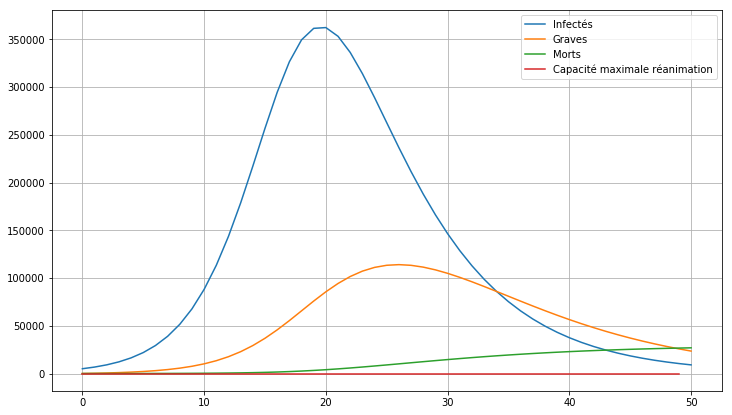

In [235]:
fig, ax = plt.subplots(figsize=(12,7))
#plt.plot(S,label="Susceptibles")
plt.plot(I,label="Infectés")
plt.plot(G,label="Graves")
#plt.plot(R,label="Remis")
plt.plot(M,label="Morts")
plt.plot([capacite]*periodes, label="Capacité maximale réanimation")

plt.legend(loc="best")
plt.grid()

# Calibration

## Données du ministère

In [82]:
data_brute = pd.read_csv('chiffres-cles.csv')
# data[data.maille_code=='DEP-59']

In [83]:
dates = pd.read_csv('dates.csv')

On garde uniquement les données nationales du ministere:
(si on voulait les données régionales, on prendrait maille_code=='DEP-59' ou maille_code='REG-??')

In [84]:
data_brute = data_brute.loc[data_brute['source_type'] == "ministere-sante"]
data_brute = data_brute.loc[data_brute['granularite'] == "pays"].reset_index()

On conserve les colonnes d'intérêt.

In [85]:
data_brute = data_brute[['date','cas_confirmes', 'deces', 'deces_ehpad', 'reanimation', 'hospitalises', 'gueris']]

data_brute = dates.set_index('date').join(data_brute.set_index('date'))

Mesure temporaire : on va compléter les données manquantes.

In [86]:
data = data_brute.interpolate(limit_area='inside')

In [87]:
data = data.dropna(how='all')

In [88]:
data['reanimation'][0:3] = 0
data['gueris'][0:3] = 0

In [89]:
data

,cas_confirmes,deces,deces_ehpad,reanimation,hospitalises,gueris
date,,,,,,
2020-01-24,3.0,0.0,NaN,0.000000,3.00,0.00
2020-01-25,3.0,0.0,NaN,0.000000,3.00,0.00
2020-01-26,3.0,0.0,NaN,0.000000,3.00,0.00
2020-01-27,3.0,0.0,NaN,0.000000,3.00,0.00
2020-01-28,4.0,0.0,NaN,1.000000,4.00,0.00
2020-01-29,5.0,0.0,NaN,2.000000,5.00,0.00
2020-01-30,6.0,0.0,NaN,2.000000,6.00,0.00
2020-01-31,6.0,0.0,NaN,2.000000,6.00,0.00
2020-02-01,6.0,0.0,NaN,1.500000,6.00,0.00


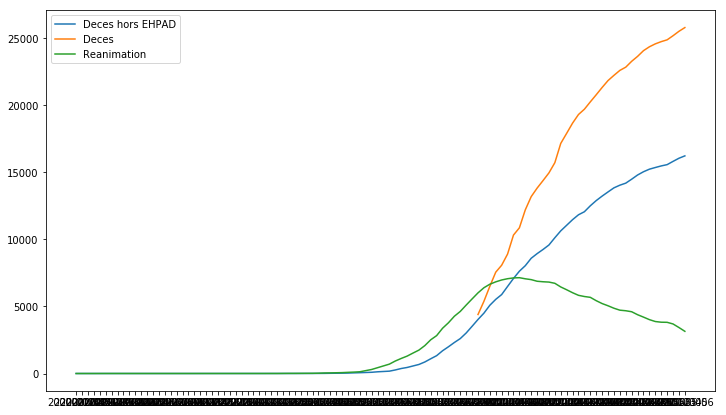

In [90]:
fig, ax = plt.subplots(figsize=(12,7))
#plt.plot(data['cas_confirmes'], label="Infectés")
plt.plot(data['deces'], label="Deces hors EHPAD")
plt.plot(data['deces'] + data['deces_ehpad'], label="Deces")
plt.plot(data['reanimation'], label="Reanimation")
plt.legend()

In [91]:
avant_confinement = data.loc[:'2020-03-16'].shape[0]
renforcement = data.loc[:'2020-03-24'].shape[0]
prolongement = data.loc[:'2020-04-13'].shape[0]
deconfinement = data.loc[:'2020-05-11'].shape[0]

## Le cas simple du SIR

L'objectif est d'obtenir un vecteur de paramètres qui permet au SIR d'être le plus proche d'une matrice de données sur les compartiments.

Les paramètres à optimiser sont :

\begin{bmatrix} \beta \\ \gamma \end{bmatrix}

Ce qui nous donne une matrice du nombre d'individus dans les compartiments du modèles par période temporelle numérotée de 1 à n:

\begin{bmatrix} s_1 & i_1 & r_1 \\ s_2 & i_2 & r_2 \\ ... & ... & ... \\ s_n & i_n & r_n \end{bmatrix}

Pour évaluer cette solution il faut choisir une fonction de distance avec la matrice des données réelles, comme par exemple une norme sur l'espace des matrices. Techniquement, on peut faire sauter une colonne car la somme des colonnes fait 1.

On teste avec une matrice généré artificiellement:

In [14]:
I=[0.0005]
S=[0.9995]
R=[0.0]

liste_tauxTransmiss = [0.8] * 20
tauxRemis = 0.15

SIR_increment(I, S, R, liste_tauxTransmiss, tauxRemis)

data_objectif = np.array([I, R])

NameError: name 'SIR_increment' is not defined

On code un algorithme génétique qui cherche 0.8 et 0.15 à partir des données des comportements sur des périodes possiblement différenciées.

In [58]:
def eval_SIR(candidat, data_objectif, periodes_confinement, population=1):
    candidat = np.absolute(candidat)
    I=[data_objectif[0][0]]
    S=[1 - data_objectif[0][0]]
    R=[0.0]
    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]] * periode
        i += 1
    tauxRemis = candidat[-1]
    SIR_increment(I, S, R, liste_taux, tauxRemis)
    candidat_data = np.array([I, R])
    return np.linalg.norm(candidat_data - data_objectif),

In [59]:
eval_SIR([0.8, 0.15], data_objectif, [20])

(0.0,)

In [9]:
import random
from deap import base
from deap import creator
from deap import tools
import array
import numpy
from deap import algorithms

In [10]:
def optimisation_genetique(n_indiv, n_gen, data_objectif, periodes_confinement, fonction_eval, nb_parametres, verbose=False):

    creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", random.random)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=nb_parametres)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", fonction_eval, data_objectif=data_objectif, periodes_confinement=periodes_confinement)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.0001, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=n_indiv)
    hof = tools.HallOfFame(1)
    
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=n_gen, 
                                   stats=stats, halloffame=hof, verbose=verbose)
    return hof[0]

In [48]:
optimisation_genetique(300, 50, data_objectif, [20], eval_SIR, 2)

[0.800365304295807, 0.14967895521885255]

## Calibration sur les données

On passe les données en pourcentage:

In [60]:
I=np.array(data['cas_confirmes']/67000000)
R=np.array(data['gueris']/67000000)
S=[1]*len(data.index) - I - R
data_objectif_ministere = np.array([I, R])

In [61]:
solution = optimisation_genetique(300, 400, data_objectif_ministere, [len(data.index)-1], eval_SIR, 2)

In [63]:
solution

[0.20461056499636268, -0.055643367423847775]

In [64]:
solution = np.absolute(solution)

On a un souci de taux négatifs

In [65]:
def compare_solution(solution, data_objectif, periodes_confinement):
    I=[data_objectif[0][0]]
    S=[1-data_objectif[0][0]]
    R=[0.0]
    i = 0
    liste_taux=[]
    for periode in periodes_confinement:
        liste_taux = liste_taux + [solution[i]] * periode
        i += 1
    SIR_increment(I, S, R, liste_taux, solution[-1])
    fig, ax = plt.subplots(figsize=(12,7))
    plt.plot(data_objectif[0], label="Infectés (données)")
    plt.plot(I, label="Infectés (estimation")
    plt.plot(data_objectif[1], label="Remis (données)")
    plt.plot(R, label="Remis (estimation)")
    plt.legend()

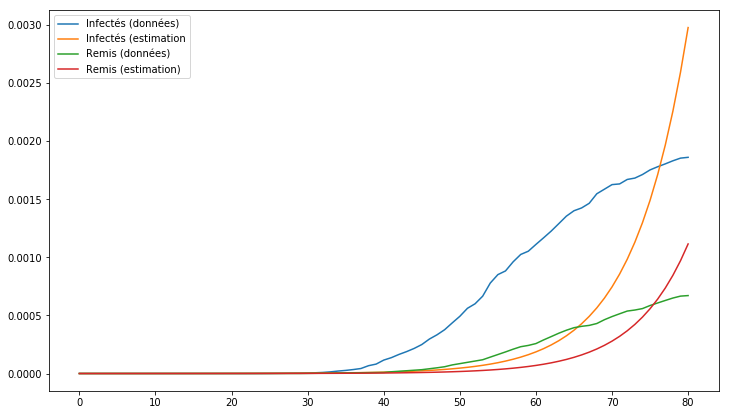

In [67]:
compare_solution(solution, data_objectif_ministere, [len(data.index)-1])

L'optimisation fait au mieux compte-tenu du fait que la courbe des cas confirmés ne colle pas avec un modèle SIR, pour des raisons de confinement (entre autres...).

## Le cas avec confinement

En théorie rien n'empêche d'augmenter la taille du vecteur de paramètres à optimiser pour introduire plusieurs taux de transmission pour représenter le confinement : \begin{bmatrix} \beta_1 \\ \beta_2 \\ \beta_3 \\ \gamma \end{bmatrix}

Le cas extrême est ainsi d'attribuer un taux par période.

Imaginons qu'à la période 10 (sur 20) un confinement survienne.

In [68]:
I=[0.0005]
S=[0.9995]
R=[0.0]

liste_tauxTransmiss = [0.8] * 10 + [0.1] * 10
tauxRemis = 0.15

SIR_increment(I, S, R, liste_tauxTransmiss, tauxRemis)
data_objectif = np.array([I, R])
periodes_confinement = [10,10]

In [15]:
eval_SIR([0.8, 0.1, 0.15], data_objectif, [10, 10])

(0.0,)

In [464]:
solution = optimisation_genetique(300, 1000, data_objectif, periodes_confinement, eval_SIR, 3)

In [465]:
solution

[0.8002504618655818, 0.1012532362594515, 0.1510015595986532]

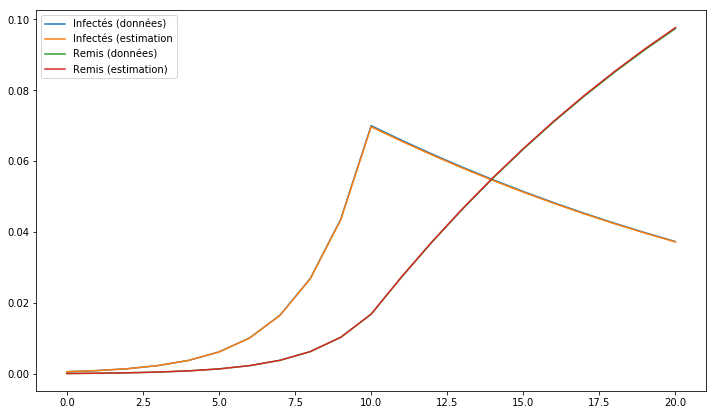

In [466]:
compare_solution(solution, data_objectif, [10, 10])

## Données réelles

En France, trois dates marquantes pour le confinement : annonce le 17/03 (n=40), durcissement le 24/03 (n=47) et prolongement le 13/04 (n=67).

In [69]:
periodes_confinement = [40, 7, len(data.index)-48]

In [70]:
solution = optimisation_genetique(300, 1000, data_objectif_ministere, periodes_confinement,  eval_SIR, 4)

In [72]:
solution = np.absolute(solution)

In [73]:
solution

array([0.22965171, 0.33521787, 0.07186715, 0.02547864])

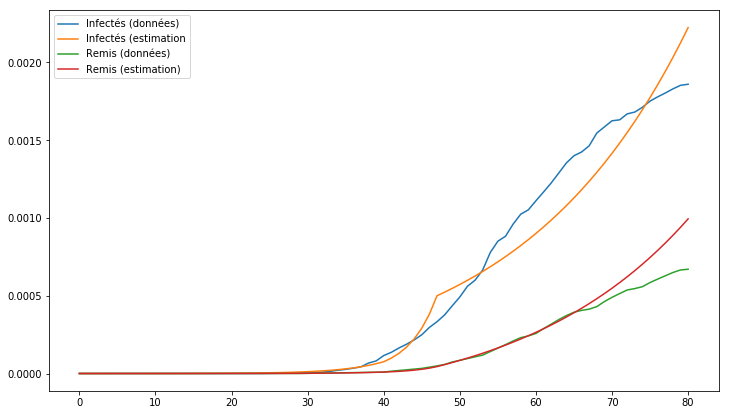

In [74]:
compare_solution(solution, data_objectif_ministere, periodes_confinement)

Les résultats sont rassurants : avec des données inexactes on ne peut pas faire rentrer le modèle SIR. Il y a une vraie nécéssité d'ajouter des boîtes supplémentaires et de focaliser le calibrage sur les données que l'on sait être correctes (nombre de patients en réanimation par exemple). Si le modèle fitte bien ce sera un vrai argument.

## Le cas du SIGRM

On définit une nouvelle fonction d'évaluation basée sur le SIGRM et qui évalue uniquement sur le nombre de cas graves et sur le nombre de morts:

In [11]:
tauxInfecteInitial = 0.0005
tauxGraves = 0.06
tauxRemis = 0.2
tauxRemisGraves = 0.2
tauxMortalite = 0.1

In [12]:
def eval_SIGRM(candidat, data_objectif, periodes_confinement, population=1):
    S=[1 - tauxInfecteInitial]
    I=[tauxInfecteInitial]
    candidat = np.absolute(candidat)
    G=[0.0]
    R=[0.0]
    M=[0.0]
    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]] * periode
        i += 1
    #I= [candidat[-1]]
    #S=[1-candidat[-1]]
    SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    candidat_data = np.array([S, I, G, R, M])
    return np.linalg.norm(np.array([candidat_data[2],candidat_data[4]] ) - np.array([data_objectif[2],data_objectif[4]]) ),

In [13]:
def compare_solution_SIGRM(solution, data_objectif, periodes_confinement):
    S=[1 - tauxInfecteInitial]
    I=[tauxInfecteInitial]
    solution = np.absolute(solution)
    G=[0.0]
    R=[0.0]
    M=[0.0]
    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [solution[i]] * periode
        i += 1
        
    #I= [solution[-1]]
    #S=[1-solution[-1]]
    
    SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    
    fig, ax = plt.subplots(figsize=(12,7))
    plt.plot(data_objectif[2], label="Graves (données)")
    plt.plot(G, label="Graves (estimation")
    plt.plot(data_objectif[4], label="Morts (données)")
    plt.plot(M, label="Morts (estimation)")
    plt.legend()

Données artificielles pour tester :

In [226]:
S=[0.9995]
I=[0.0005]
G=[0.0]
R=[0.0]
M=[0.0]

periodes_confinement = [10,10]
liste_tauxTransmiss = [0.8] * 10 + [0.1] * 10

#tauxMortalite = 0.01
SIGRM_increment(S, I, G, R, M, liste_tauxTransmiss, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
data_objectif = np.array([S, I, G, R, M])

On vérifie que la fonction d'évaluation semble fonctionner:

In [227]:
eval_SIGRM([0.8, 0.1, 0.05, 0.1], data_objectif, periodes_confinement)

(0.0,)

In [229]:
solution = optimisation_genetique(300, 500, data_objectif, periodes_confinement, eval_SIGRM, nb_parametres=2)

In [230]:
print(solution)

[0.7998029394213741, 0.10063837452200357]


In [231]:
eval_SIGRM(solution, data_objectif, periodes_confinement)

(1.4262442113330182e-05,)

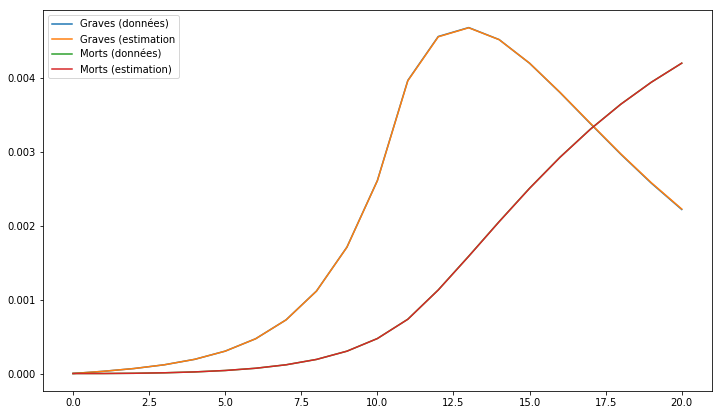

In [232]:
compare_solution_SIGRM(solution, data_objectif, periodes_confinement)

## SIGRM sur données réelles

In [92]:
I=np.array(data['cas_confirmes']/67000000)
R=np.array(data['gueris']/67000000)
G=np.array(data['reanimation']/67000000)
M=np.array((data['deces'])/67000000)
#M=np.array((data['deces'] + data['deces_ehpad'])/67000000)

S=[1]*len(data.index) - I - G - R - M

data_objectif_ministere = np.array([S, I, G, R, M])

periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, len(data.index) - prolongement-1]

tauxInfecteInitial = 20 * data['cas_confirmes'][0]/67000000 # Ici on peut modifier pour s'écarter du chiffre officiel initial

Optimisation :

In [234]:
solution = optimisation_genetique(500, 1000, data_objectif_ministere, periodes_confinement, eval_SIGRM, nb_parametres=2)

In [235]:
solution

[0.40177523496410894, 0.2613471988804195]

Comparaison graphique :

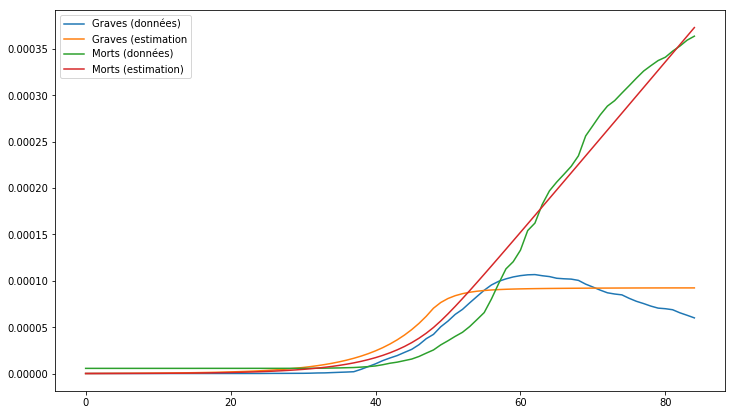

In [236]:
compare_solution_SIGRM(solution, data_objectif_ministere, periodes_confinement)

## Solutions intéressantes

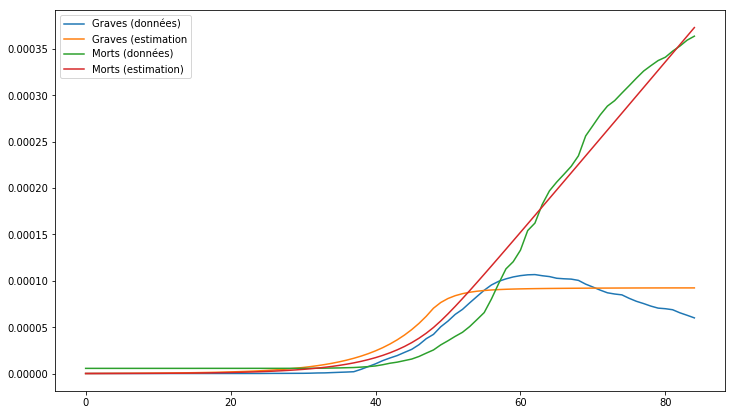

In [244]:
compare_solution_SIGRM([0.40177523496410894, 0.2613471988804195], data_objectif_ministere, periodes_confinement)

In [617]:
I=np.array(data['cas_confirmes']/67000000)
R=np.array(data['gueris']/67000000)
G=np.array(data['reanimation']/67000000)
M=np.array((data['deces'])/67000000)

S=[1]*len(data.index) - I - G - R - M

data_objectif_ministere = np.array([S, I, G, R, M])

tauxInfecteInitial = data['cas_confirmes'][0]/67000000
tauxGraves = 0.06
tauxRemis = 0.1
tauxRemisGraves = 0.15
tauxMortalite = 0.07

In [ ]:
compare_solution_SIGRM([0.375, 0.14], data_objectif_ministere, periodes_confinement)

# SIGRM avec lag

In [293]:
def SIGRM_lag_increment(S, I, G, R, M, liste_tauxTransmiss, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite):
    population = S[0] + I[0] + G[0] + R[0] + M[0]
    nouveauxCas = [0]
    nouveauxInfectesRemis = [0]
    nouveauxInfectesGraves = [0]
    nouveauxGravesRemis = [0]
    nouveauxGravesMorts = [0]

    for tauxTransmiss in liste_tauxTransmiss:
        nouveauxCas.append(tauxTransmiss*S[-1]*I[-1]/ population)
        if len(nouveauxCas) > 7:
            nouveauxInfectesRemis.append(tauxRemis*nouveauxCas[-8])
            nouveauxInfectesGraves.append(tauxGraves*nouveauxCas[-8])
        else:
            nouveauxInfectesRemis.append(0)
            nouveauxInfectesGraves.append(0)
        
        if len(nouveauxInfectesGraves) > 3:
            nouveauxGravesRemis.append(tauxRemisGraves*nouveauxInfectesGraves[-4])
            nouveauxGravesMorts.append(tauxMortalite*nouveauxInfectesGraves[-4])
        else:
            nouveauxGravesRemis.append(0)
            nouveauxGravesMorts.append(0)
        #
        S.append(S[-1]-nouveauxCas[-1]) 
        I.append(I[-1]+nouveauxCas[-1]-nouveauxInfectesRemis[-1]-nouveauxInfectesGraves[-1])
        G.append(G[-1]+nouveauxInfectesGraves[-1]-nouveauxGravesMorts[-1]-nouveauxGravesRemis[-1])
        R.append(R[-1]+nouveauxInfectesRemis[-1]+nouveauxGravesRemis[-1])
        M.append(M[-1]+nouveauxGravesMorts[-1])
        assert(round(S[-1]+I[-1]+G[-1]+R[-1]+M[-1],3) == population) # la somme fait toujours 1
    print(nouveauxInfectesRemis)
    return None

In [294]:
S=[0.995 *1000]
I=[0.005 *1000]
G=[0.0]
R=[0.0]
M=[0.0]

In [295]:
periodes = 50
liste_tauxTransmiss = [0.5] * periodes
tauxRemis = 0.5
tauxGraves = 0.5
tauxRemisGraves = 0.5
tauxMortalite = 0.5

In [296]:
SIGRM_lag_increment(S, I, G, R, M, liste_tauxTransmiss, tauxRemis, tauxGraves,tauxRemisGraves, tauxMortalite)

[0, 0, 0, 0, 0, 0, 0, 0.0, 1.24375, 1.8578593359375, 2.769426640816288, 4.115443745052787, 6.087327685060201, 8.94191738184601, 13.000747283708211, 18.616651527015225, 25.521507315568705, 33.87266984775433, 42.97528941390283, 51.28781093547537, 56.49889397267743, 56.35652759516275, 50.149378798272835, 39.641461578721064, 28.183440781078378, 18.469648220787064, 11.490109454736677, 6.956144005822421, 4.160364792145942, 2.472309756921061, 1.461147035508043, 0.8606443622618659, 0.5083497587771929, 0.30412653711193094, 0.18640727152540823, 0.11843938587194512, 0.07900182444673567, 0.056047942169944735, 0.04270341790161847, 0.03496954841085555, 0.03049145079070362, 0.02788668241218566, 0.02635579921485448, 0.025442165972298224, 0.024885243643433155, 0.024535112517161485, 0.024304679225155904, 0.024143251960576227, 0.024021501384118345, 0.023922599156299827, 0.02383692494889138]


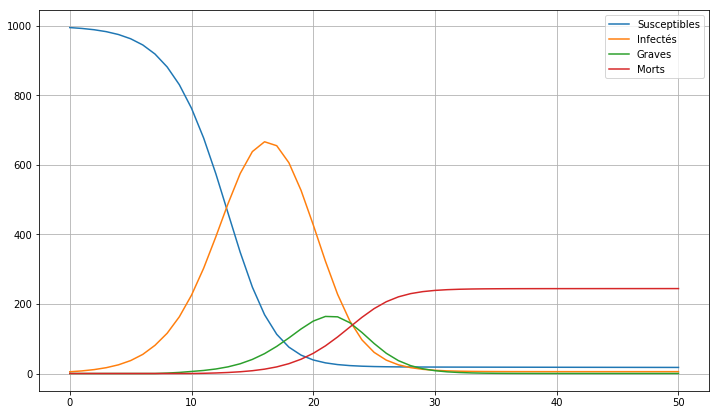

In [297]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(S,label="Susceptibles")
plt.plot(I,label="Infectés")
plt.plot(G,label="Graves")
#plt.plot(R,label="Remis")
plt.plot(M,label="Morts")
plt.legend(loc="best")
plt.grid()

La courbe classique qui existait déjà avant 

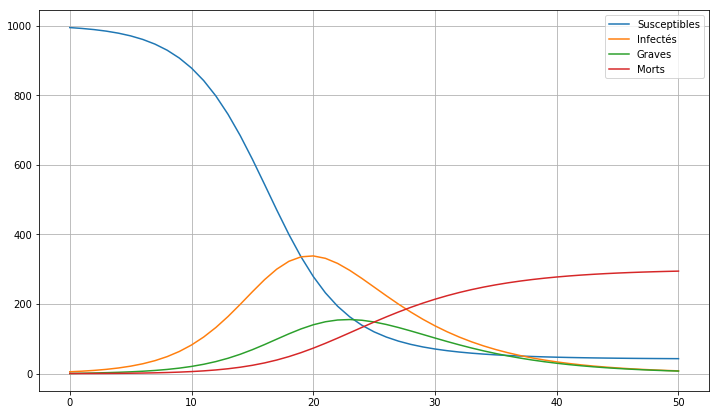

In [299]:
S=[0.995 *1000]
I=[0.005 *1000]
G=[0.0]
R=[0.0]
M=[0.0]
SIGRM_increment(S, I, G, R, M, liste_tauxTransmiss, 0.01, 0.15, 0.2, 0.1)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(S,label="Susceptibles")
plt.plot(I,label="Infectés")
plt.plot(G,label="Graves")
#plt.plot(R,label="Remis")
plt.plot(M,label="Morts")
plt.legend(loc="best")
plt.grid()

# SABGRM

## Définition du modèle

In [17]:
def SABGRM_increment(S, A, B, G, R, M, liste_taux_A, liste_taux_B, taux_A_R, taux_B_R, taux_G, 
                     taux_G_R, taux_M):
    population = S[0] + A[0] + B[0] + G[0] + R[0] + M[0]
    for taux_A, taux_B in zip(liste_taux_A, liste_taux_B):
        nouveaux_contacts = S[-1] * (A[-1] + B[-1]) / population
        nouveaux_A = taux_A * nouveaux_contacts
        nouveaux_B = taux_B * nouveaux_contacts
        nouveaux_A_R = taux_A_R * A[-1]
        nouveaux_B_R = taux_B_R * B[-1]
        nouveaux_G = taux_G * B[-1]
        nouveaux_G_R = taux_G_R * G[-1]
        nouveaux_M = taux_M * G[-1] 
        
        S.append(S[-1] - nouveaux_A - nouveaux_B) 
        A.append(A[-1] + nouveaux_A - nouveaux_A_R)
        B.append(B[-1] + nouveaux_B - nouveaux_B_R - nouveaux_G)
        G.append(G[-1] + nouveaux_G - nouveaux_G_R - nouveaux_M)
        R.append(R[-1] + nouveaux_A_R + nouveaux_B_R + nouveaux_G_R)
        M.append(M[-1] + nouveaux_M)
        total = S[-1] + A[-1] + B[-1] + G[-1] + R[-1] + M[-1]
        assert(round(total,3) == population) # la somme fait toujours 1
    return None

In [84]:
S=[0.9996]
A=[0.0002]
B=[0.0002]
G=[0.0]
R=[0.0]
M=[0.0]

periodes_confinement = [20,20]
liste_taux_A = [0.3] * 20 + [0.2] * 20
liste_taux_B = [0.2] * 20 + [0.05] * 20

taux_A_R = 0.15
taux_B_R = 0.15
taux_G = 0.1
taux_G_R = 0.15
taux_M = 0.15

In [85]:
SABGRM_increment(S, A, B, G, R, M, liste_taux_A, liste_taux_B, taux_A_R, taux_B_R, taux_G, taux_G_R, taux_M)

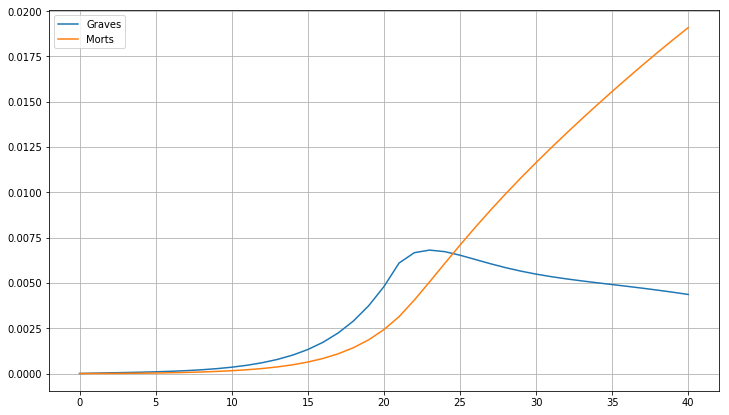

In [86]:
fig, ax = plt.subplots(figsize=(12,7))
#plt.plot(S,label="Susceptibles")
#plt.plot(A,label="Asymptotiques")
#plt.plot(B,label="Symptotiques")
plt.plot(G,label="Graves")
#plt.plot(R,label="Remis")
plt.plot(M,label="Morts")
plt.legend(loc="best")
plt.grid()

## Optimisation des paramètres sur données test

In [96]:
def eval_SABGRM(candidat, data_objectif, periodes_confinement, population=1):
    candidat = np.absolute(candidat)
    S=[data_objectif[0][0]]
    A=[data_objectif[1][0]]
    B=[data_objectif[2][0]]
    G=[data_objectif[3][0]]
    R=[data_objectif[4][0]]
    M=[data_objectif[5][0]]
    liste_taux_A = []
    liste_taux_B = []
    i = 0
    for periode in periodes_confinement:
        liste_taux_A = liste_taux_A + [candidat[i]] * periode
        liste_taux_B = liste_taux_B + [candidat[len(periodes_confinement) + i]] * periode
        i += 1
    taux_M = candidat[-1]

    SABGRM_increment(S, A, B, G, R, M, liste_taux_A, liste_taux_B, taux_A_R, taux_B_R, taux_G, taux_G_R, taux_M)
    candidat_data = np.array([S, A, B, G, R, M])
    return np.linalg.norm(np.array([candidat_data[3],candidat_data[5]] ) - np.array([data_objectif[3],data_objectif[5]]) ),

In [113]:
def compare_solution_SIGRM(solution, data_objectif, periodes_confinement):
    solution = np.absolute(solution)
    S=[data_objectif[0][0]]
    A=[data_objectif[1][0]]
    B=[data_objectif[2][0]]
    G=[data_objectif[3][0]]
    R=[data_objectif[4][0]]
    M=[data_objectif[5][0]]
    liste_taux_A = []
    liste_taux_B = []
    i = 0
    for periode in periodes_confinement:
        liste_taux_A = liste_taux_A + [solution[i]] * periode
        liste_taux_B = liste_taux_B + [solution[len(periodes_confinement) + i]] * periode
        i += 1

    taux_M = solution[-1]
    
    SABGRM_increment(S, A, B, G, R, M, liste_taux_A, liste_taux_B, taux_A_R, taux_B_R, taux_G, taux_G_R, taux_M)
    
    fig, ax = plt.subplots(figsize=(12,7))
    plt.plot(data_objectif[3], label="Graves (données)")
    plt.plot(G, label="Graves (estimation)")
    plt.plot(data_objectif[5], label="Morts (données)")
    plt.plot(M, label="Morts (estimation)")
    plt.legend()

Testons avec des données artificielles :

In [98]:
S=[0.9996]
A=[0.0002]
B=[0.0002]
G=[0.0]
R=[0.0]
M=[0.0]

periodes_confinement = [20,20]
liste_taux_A = [0.3] * 20 + [0.2] * 20
liste_taux_B = [0.2] * 20 + [0.05] * 20

taux_A_R = 0.15
taux_B_R = 0.15
taux_G = 0.1
taux_G_R = 0.15
taux_M = 0.1

SABGRM_increment(S, A, B, G, R, M, liste_taux_A, liste_taux_B, taux_A_R, taux_B_R, taux_G, taux_G_R, taux_M)
data_objectif = np.array([S, A, B, G, R, M])

On vérifie que la fonction d'évaluation semble fonctionner:

In [100]:
eval_SABGRM([0.3, 0.2, 0.2, 0.05, 0.1], data_objectif, periodes_confinement)

(0.0,)

In [101]:
solution = optimisation_genetique(500, 2000, data_objectif, periodes_confinement, eval_SABGRM, 
                                  nb_parametres=len(periodes_confinement)*2 + 1)

In [102]:
print(solution)

[0.34103601255494403, 0.23396920524397735, -0.16825770553170546, -0.0396070212889054, -0.10182922505802909]


In [103]:
eval_SABGRM(solution, data_objectif, periodes_confinement)

(0.0015180454586220635,)

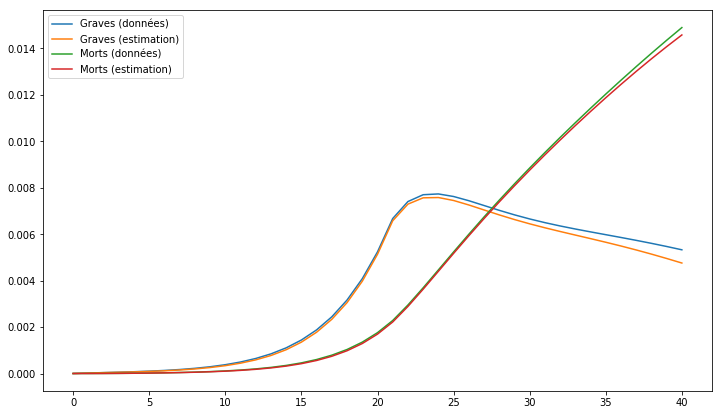

In [104]:
compare_solution_SIGRM(np.absolute(solution), data_objectif, periodes_confinement)

## Optimisation sur données réelles

In [24]:
A=np.array(data['cas_confirmes']/67000000) # Ici on suppose 50% d'asymptotiques, comme Ferguson.
B=np.array(data['cas_confirmes']/67000000)
G=np.array(data['reanimation']/67000000)
R=np.array(data['gueris']/67000000)
M=np.array((data['deces'] + data['deces_ehpad'])/67000000)

S=[1]*len(data.index) - A - B - G - R - M

data_objectif_ministere = np.array([S, A, B, G, R, M])

periodes_confinement = [47, len(data.index) - 48]

Optimisation :

In [115]:
solution = optimisation_genetique(500, 2000, data_objectif_ministere, periodes_confinement, eval_SABGRM, 
                                  nb_parametres=len(periodes_confinement)*2 + 1)

KeyboardInterrupt: 

In [107]:
solution

[-0.16794893677554096,
 -0.07175029607187153,
 0.23401102125318923,
 -0.12667858562189444,
 -0.1100810430788725]

Comparaison graphique :

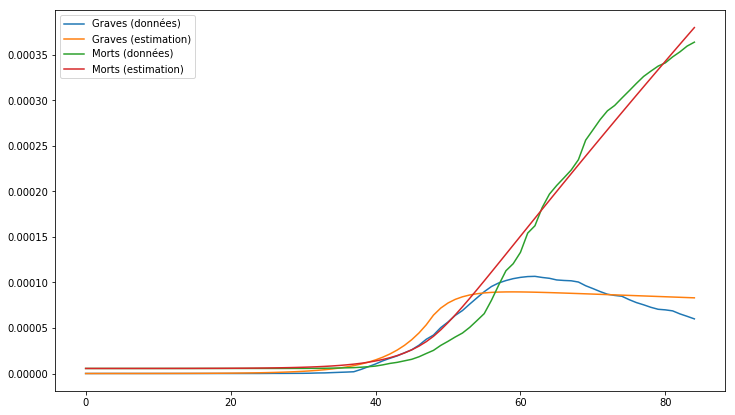

In [116]:
compare_solution_SIGRM(solution, data_objectif_ministere, periodes_confinement)

## Solutions intéressantes

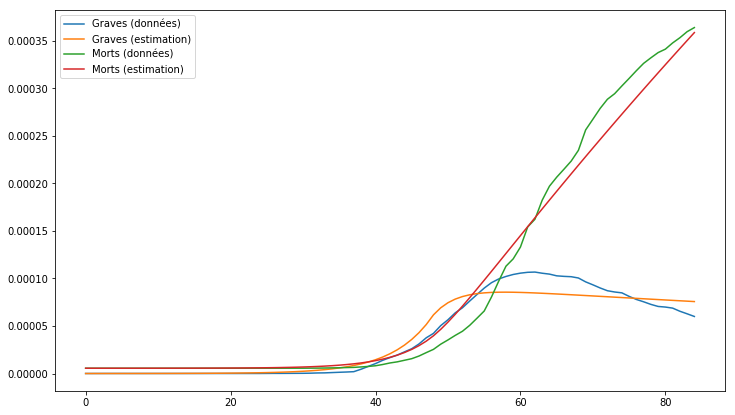

In [130]:
compare_solution_SIGRM([0.167, 0.07, 0.234, 0.127, 0.11], data_objectif_ministere, periodes_confinement)

# Données de https://datacovid.org/data/
afin d'avoir des matrices de contact durant confinement

vague1=7-14 avril  vague2=15-21 avril   vague3=


In [55]:
data = pd.read_csv('/Users/mathieu/Downloads/vague_1/Datacovid_BD_Vague_1.tsv', header=0, sep='\t')
print("taille init : ",data.shape)
#print(data.head())
# signification des champs dans l'archive : fichier Description_Donnees.pdf
# On garde la région Hauts de France, l'age et le nombre de contacts des denieres 24h
data=data.loc[data.REG12==5,['AGE2','B5Q']]
print("taille rest : ",data.shape)
age2categories=["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64",">=65"]
agglo5catelogies=["Rural","2.000 à 19.999 hab","20.000 à 99.999 hab","100.000 hab. et plus","Paris"]
# regrouper par catégorie
data.groupby(by='AGE2').agg([np.sum, np.min, np.max,np.mean, np.std])
#data.groupby(by=['B5Q','AGE2']).size()
#data.describe()

taille init :  (5000, 82)
taille rest :  (476, 2)


B5Q                               
      sum amin amax      mean        std
AGE2                                    
1     138    0   50  2.421053   7.755061
2      56    0   40  2.434783   8.300198
3      56    0   10  1.217391   2.346752
4     119    0   60  2.586957   9.294147
5      53    0   20  1.204545   3.745258
6     306    0  200  7.116279  31.076104
7      95    0   20  2.878788   5.835011
8     124    0   60  3.179487  10.195127
9      81    0   30  1.840909   5.548698
10    117    0   20  1.158416   3.145577

# Présentation du 06/05

In [93]:
couleur_a='#396AB1'
couleur_b='#DA7C30'
dpi=300
figsize = (10,5)

In [94]:
avant_confinement = data.loc[:'2020-03-16'].shape[0]
renforcement = data.loc[:'2020-03-24'].shape[0]
prolongement = data.loc[:'2020-04-13'].shape[0]
aujourdhui = len(data.index) - 1
deconfinement = aujourdhui + 6
#deconfinement = data.loc[:'2020-05-11'].shape[0]

In [95]:
periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, aujourdhui - prolongement]
candidat=[0.275372335146436, 0.38676389057705435, 0.08906800372536995, 0.10045712354211243, 
          data['cas_confirmes'][0]/67000000, 0.07, 0.07, 0.011445165643347396, 0.06942900452349375]
taux_intermediaire = (candidat[0] + candidat[3])/2

Evolution du R0 :

In [96]:
print(candidat[0] / (candidat[5] + candidat[6]))
print(candidat[1] / (candidat[5] + candidat[6]))
print(candidat[2] / (candidat[5] + candidat[6]))
print(candidat[3] / (candidat[5] + candidat[6]))

1.9669452510459713
2.762599218407531
0.6362000266097853
0.7175508824436602


In [97]:
tauxInfecteInitial = candidat[-5] 
tauxGraves = candidat[-4]
tauxRemis = candidat[-3]
tauxRemisGraves = candidat[-2]
tauxMortalite = candidat[-1]

S=[1 - tauxInfecteInitial]
I=[tauxInfecteInitial]
G=[0.0]
R=[0.0]
M=[0.0]

liste_taux = []
i = 0
for periode in periodes_confinement:
    liste_taux = liste_taux + [candidat[i]] * periode
    i += 1

In [98]:
SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

## Figure 1 : Nombre de personnes en réanimation

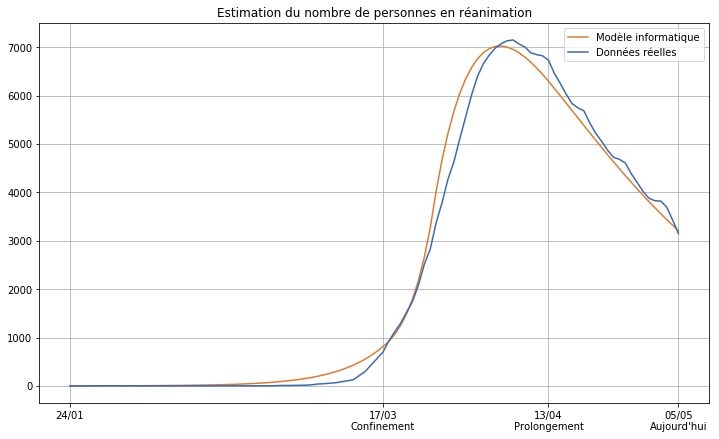

In [99]:
fig, ax = plt.subplots(figsize=(12,7))

plt.plot(np.array(G)*67000000, label="Modèle informatique", color=couleur_b, linestyle='-')
plt.plot(data_objectif_ministere[2]*67000000, label="Données réelles", color=couleur_a)

plt.xticks([0, avant_confinement, prolongement, aujourdhui], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '05/05\nAujourd\'hui'), rotation=0)

plt.title("Estimation du nombre de personnes en réanimation")
plt.legend()
plt.grid()
plt.savefig("slides/figure1.jpg", dpi=dpi)

## Figure 2 : Nombre de décès

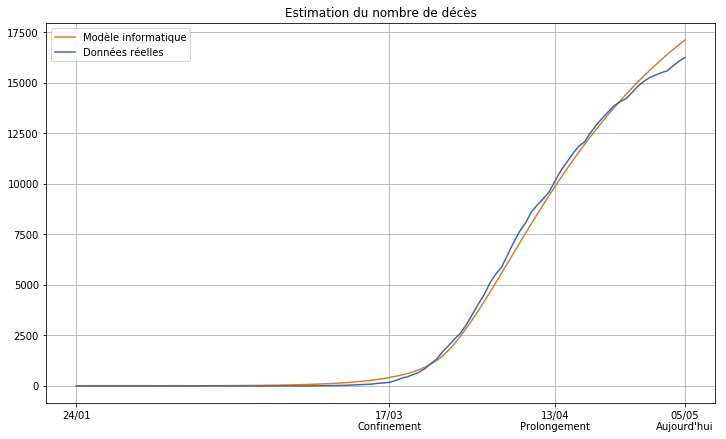

In [100]:
fig, ax = plt.subplots(figsize=(12,7))

plt.plot(np.array(M)*67000000, label="Modèle informatique", color=couleur_b, linestyle='-')
plt.plot(data_objectif_ministere[4]*67000000, label="Données réelles", color=couleur_a)

plt.xticks([0, avant_confinement, prolongement, aujourdhui], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '05/05\nAujourd\'hui'), rotation=0)

plt.title("Estimation du nombre de décès")
plt.legend()
plt.grid()
plt.savefig("slides/figure2.jpg", dpi=dpi)

## Figure 3 : Scénarios possibles en réanimation

In [70]:
def scenario(listeTaux, category="G", label=None, linestyle='solid', color=couleur_b):
    tauxInfecteInitial = candidat[-5] 
    tauxGraves = candidat[-4]
    tauxRemis = candidat[-3]
    tauxRemisGraves = candidat[-2]
    tauxMortalite = candidat[-1]

    S=[1 - tauxInfecteInitial]
    I=[tauxInfecteInitial]
    G=[0.0]
    R=[0.0]
    M=[0.0]

    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]] * periode
        i += 1
    SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    SIGRM_increment(S, I, G, R, M, listeTaux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    if category == "G":
        plt.plot(np.array(G)*67000000, label=label, color=color, linestyle=linestyle)
    if category == "M":
        plt.plot(np.array(M)*67000000, label=label, color=color, linestyle=linestyle)

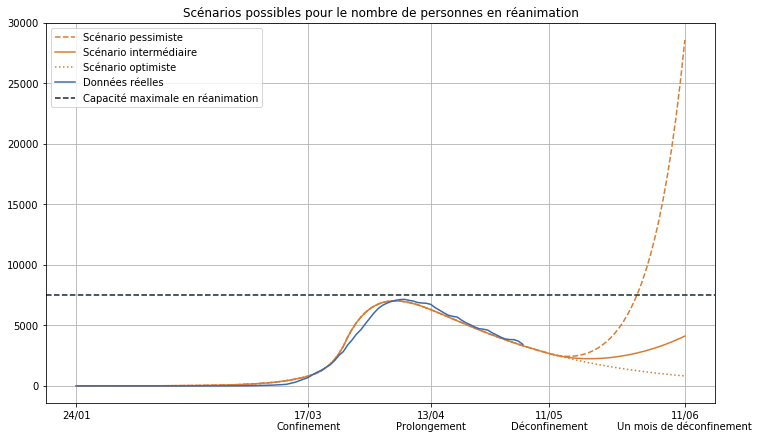

In [71]:
fig, ax = plt.subplots(figsize=(12,7))

scenario([candidat[3]]*6+[candidat[0]]*31, "G", label="Scénario pessimiste", linestyle='dashed')
scenario([candidat[3]]*6+[taux_intermediaire]*31, "G", label="Scénario intermédiaire", linestyle='-')
scenario([candidat[3]]*37, "G", label="Scénario optimiste", linestyle='dotted')
plt.plot(data_objectif_ministere[2]*67000000, label="Données réelles", color=couleur_a)
plt.axhline(y=7500, label="Capacité maximale en réanimation", color='#16262E', linestyle='dashed')

plt.grid()
plt.xticks([0, avant_confinement, prolongement, deconfinement, deconfinement+31], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '11/05\nDéconfinement', '11/06\nUn mois de déconfinement'), 
           rotation=0)

plt.title("Scénarios possibles pour le nombre de personnes en réanimation")
plt.legend()
plt.savefig("slides/figure3.jpg", dpi=dpi)

## Figure 4 : Scénarios possibles pour le nombre de décès

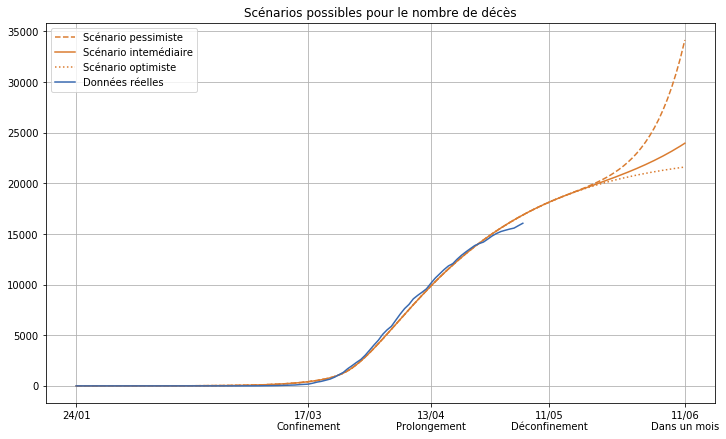

In [72]:
fig, ax = plt.subplots(figsize=(12,7))

scenario([candidat[3]]*6 + [candidat[0]]*31, "M", "Scénario pessimiste", linestyle='dashed')
scenario([candidat[3]]*6 + [taux_intermediaire]*31, "M", "Scénario intemédiaire", linestyle='-')
scenario([candidat[3]]*37, "M", "Scénario optimiste", linestyle='dotted')
plt.plot(data_objectif_ministere[4]*67000000, label="Données réelles", color=couleur_a)

plt.xticks([0, avant_confinement, prolongement, deconfinement, deconfinement+31], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '11/05\nDéconfinement', '11/06\nDans un mois'), 
           rotation=0)

plt.title("Scénarios possibles pour le nombre de décès")
plt.grid()
plt.legend()
plt.savefig("slides/figure4.jpg", dpi=dpi)

## Deuxième confinement

### Figure 5 : En cas de comportement intermédiaire : dans 40 jours

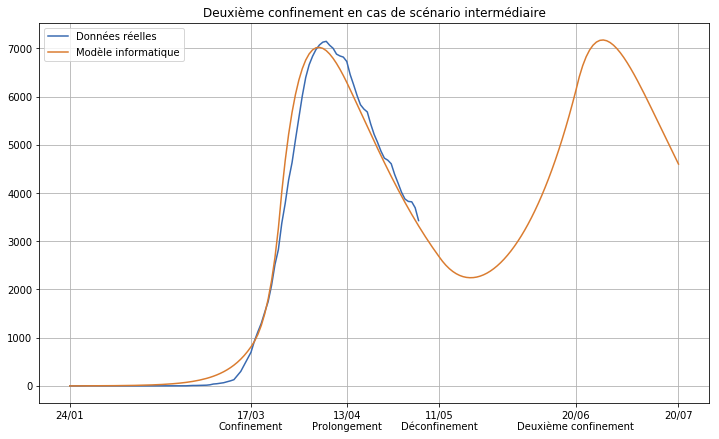

In [73]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(data_objectif_ministere[2]*67000000, label="Données réelles", color=couleur_a)

scenario([candidat[3]]* 6 + [taux_intermediaire]*40 + [candidat[3]]*30, "G", "Modèle informatique")

plt.xticks([0, avant_confinement, prolongement, deconfinement, deconfinement+40, deconfinement+70], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '11/05\nDéconfinement', '20/06\nDeuxième confinement', '20/07\n'), 
           rotation=0)

plt.title("Deuxième confinement en cas de scénario intermédiaire")
plt.grid()
plt.legend()
plt.savefig("slides/figure5.jpg", dpi=dpi)

### Figure 6 : En cas de comportement identique à l'avant-confinement : dans 14 jours

#### A deux semaines

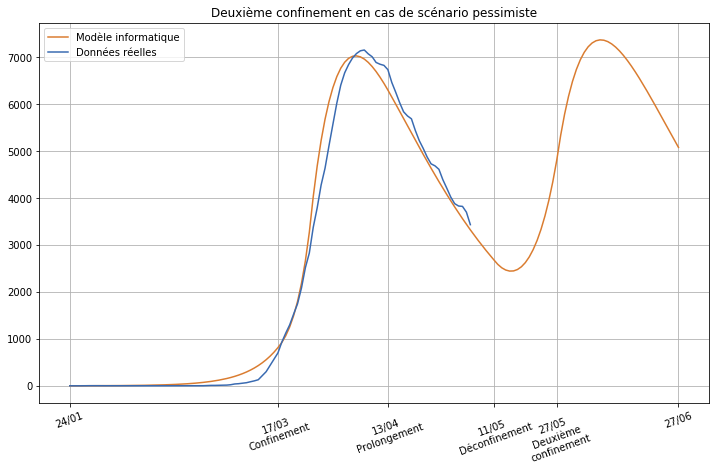

In [74]:
fig, ax = plt.subplots(figsize=(12,7))

scenario([candidat[3]]* 6 + [candidat[0]]*16 + [candidat[3]]*31, "G", "Modèle informatique")
plt.plot(data_objectif_ministere[2]*67000000, label="Données réelles", color=couleur_a)

plt.xticks([0, avant_confinement, prolongement, deconfinement, deconfinement+16, deconfinement+47], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '11/05\nDéconfinement', '27/05\nDeuxième\nconfinement', '27/06'), 
           rotation=20)
plt.title("Deuxième confinement en cas de scénario pessimiste")
plt.grid()
plt.legend()
plt.savefig("slides/figure6.jpg", dpi=dpi)

#### Si on attend un jour de plus

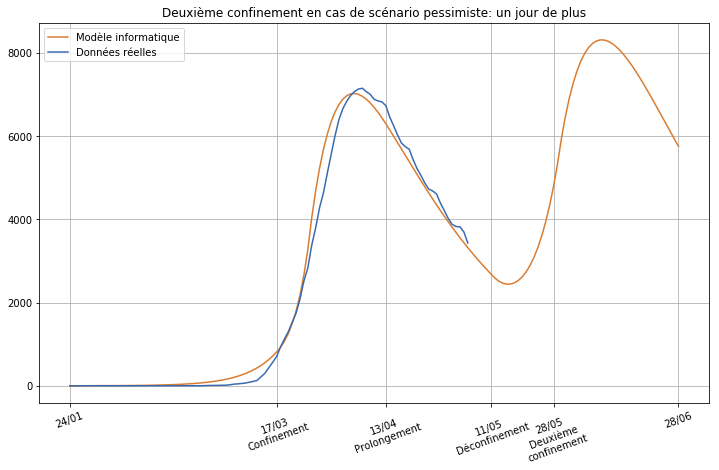

In [75]:
fig, ax = plt.subplots(figsize=(12,7))

scenario([candidat[3]]* 6 + [candidat[0]]*17 + [candidat[3]]*31, "G", "Modèle informatique")
plt.plot(data_objectif_ministere[2]*67000000, label="Données réelles", color=couleur_a)

plt.xticks([0, avant_confinement, prolongement, deconfinement, deconfinement+16, deconfinement+48], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '11/05\nDéconfinement', '28/05\nDeuxième\nconfinement', '28/06'), 
           rotation=20)
plt.title("Deuxième confinement en cas de scénario pessimiste: un jour de plus")
plt.grid()
plt.legend()
plt.savefig("slides/figure7.jpg", dpi=dpi)

### Figure 8: Si phénomène d'explosion identique à la semaine du 16 mars

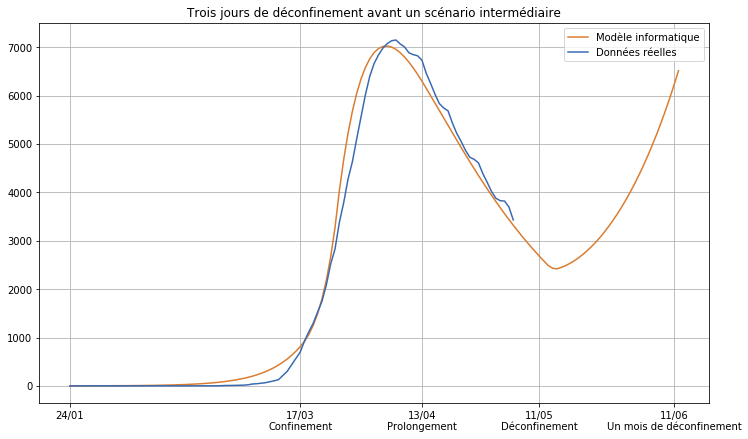

In [76]:
fig, ax = plt.subplots(figsize=(12,7))

scenario([candidat[3]]* 7 + [candidat[1]]*3 + [taux_intermediaire]*28, "G", "Modèle informatique")
plt.plot(data_objectif_ministere[2]*67000000, label="Données réelles", color=couleur_a)


plt.xticks([0, avant_confinement, prolongement, deconfinement, deconfinement+31], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '11/05\nDéconfinement', '11/06\nUn mois de déconfinement'), 
           rotation=0)
plt.title("Trois jours de déconfinement avant un scénario intermédiaire")
plt.grid()
plt.legend()
plt.savefig("slides/figure8.jpg", dpi=dpi)

### Figure 9 : Seuil nécessaire pour pas de déconfinement

In [77]:
taux_intermediaire

0.18791472934427422

0.79
0.86
0.93
1.0
1.07
1.14
1.21


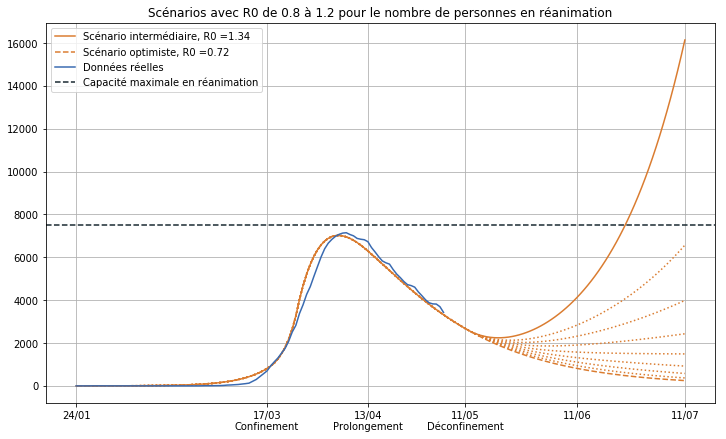

In [81]:
fig, ax = plt.subplots(figsize=(12,7))
for taux in [0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17]:
    r_0 = taux / (candidat[5] + candidat[6])
    scenario([candidat[3]]*6+[taux]*61, "G", linestyle='dotted')
    print(round(taux / (candidat[5] + candidat[6]),2))

scenario([candidat[3]]*6+[taux_intermediaire]*61, "G", 
         label="Scénario intermédiaire, R0 =" + str(round(taux_intermediaire / (candidat[5] + candidat[6]),2)), 
         linestyle='-')
scenario([candidat[3]]*67, "G", 
         label="Scénario optimiste, R0 =" + str(round(candidat[3] / (candidat[5] + candidat[6]),2)),
         linestyle='dashed')
plt.plot(data_objectif_ministere[2]*67000000, label="Données réelles", color=couleur_a)
plt.axhline(y=7500, label="Capacité maximale en réanimation", color='#16262E', linestyle='dashed')

plt.grid()
plt.xticks([0, avant_confinement, prolongement, deconfinement, deconfinement+31, deconfinement+61], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '11/05\nDéconfinement', '11/06\n', '11/07'), 
           rotation=0)

plt.title("Scénarios avec R0 de 0.8 à 1.2 pour le nombre de personnes en réanimation")
plt.legend()
plt.savefig("slides/figure9.jpg", dpi=dpi)

# SIRHGM

In [ ]:
def SIRHGM_increment(S, I, R, H, G, M, liste_taux_SI, taux_IR, taux_IH, taux_IG, taux_HR, taux_HG, taux_GR, taux_GH, taux_GM, check=False):

	for taux_SI in liste_taux_SI:

		nouveaux_SI = taux_SI * S[-1] * I[-1]	

		nouveaux_IR = taux_IR * I[-1]
		nouveaux_IH = taux_IH * I[-1]
		nouveaux_IG = taux_IG * I[-1]

		nouveaux_HR = taux_HR * H[-1]
		nouveaux_HG = taux_HG * H[-1]

		nouveaux_GR = taux_GR * G[-1]
		nouveaux_GH = taux_GH * G[-1]
		nouveaux_GM = taux_GM * G[-1]
		
		S.append(S[-1] - nouveaux_SI) 
		I.append(I[-1] + nouveaux_SI - nouveaux_IR - nouveaux_IH - nouveaux_IG)
		R.append(R[-1] + nouveaux_IR + nouveaux_HR + nouveaux_GR)
		H.append(H[-1] + nouveaux_IH + nouveaux_GH - nouveaux_HR - nouveaux_HG)
		G.append(G[-1] + nouveaux_IG + nouveaux_HG - nouveaux_GR - nouveaux_GH - nouveaux_GM)
		M.append(M[-1] + nouveaux_GM)
		if check:
			assert(round(S[-1]+I[-1]+R[-1]+H[-1]+G[-1]+M[-1],1) == 1) # la somme fait toujours 1
	return None

In [ ]:
def eval_SIRHGM(candidat, data_objectif, periodes_confinement, population=1, plot=False, check=False):
	candidat = np.absolute(candidat)

	taux_I0 = candidat[-9]

	taux_IR = candidat[-8]
	taux_IH = candidat[-7]
	taux_IG = candidat[-6]

	taux_HR = candidat[-5]
	taux_HG = candidat[-4]

	taux_GR = candidat[-3]
	taux_GH = candidat[-2]
	taux_GM = candidat[-1]
	
	# Paramètres fixes
	taux_I0 = 3/67000000
	taux_IR = 0.085


	S=[1 - taux_I0]
	I=[taux_I0]
	R=[0.0]
	H=[0.0]	
	G=[0.0]
	M=[0.0]
	liste_taux_SI = []
	i = 0
	for periode in periodes_confinement:
		liste_taux_SI = liste_taux_SI + [candidat[i]] * periode
		i += 1

	SIRHGM_increment(S, I, R, H, G, M, liste_taux_SI, taux_IR, taux_IH, taux_IG, taux_HR, taux_HG, taux_GR, taux_GH, taux_GM, check)
	candidat_data = np.array([S, I, R, H, G, M])

	if plot:
		fig, ax = plt.subplots(figsize=(12,7))
		plt.plot((data_objectif[3] + data_objectif[4])*67000000, label="Hospitalisés (données)", color='blue')
		plt.plot(np.array(H)*67000000 + np.array(G)*67000000, label="Hospitalisés (estimation)", color='blue', linestyle = ":")
		plt.plot(data_objectif[4]*67000000, label="Réanimation (données)", color='red')
		plt.plot(np.array(G)*67000000, label="Réanimation (estimation)", color='red', linestyle = ":")
		plt.plot(data_objectif[5]*67000000, label="Décès (données)", color='black')
		plt.plot(np.array(M)*67000000, label="Décès (estimation)", color='black', linestyle = ":")
		plt.legend()
		plt.savefig(str(plot) +".jpg")

	return np.linalg.norm(np.array([candidat_data[3], candidat_data[4], candidat_data[5]] ) - np.array([data_objectif[3], data_objectif[4], data_objectif[5]]) ),

In [ ]:
def collecte_donnees():

	data_brute = pd.read_csv('chiffres-cles.csv')
	dates = pd.read_csv('dates.csv')
	data_brute = data_brute.loc[data_brute['source_type'] == "ministere-sante"]
	data_brute = data_brute.loc[data_brute['granularite'] == "pays"].reset_index()

	data_brute = data_brute[['date','cas_confirmes', 'deces', 'deces_ehpad', 'reanimation', 'hospitalises', 'gueris']]
	data_brute = dates.set_index('date').join(data_brute.set_index('date'))

	data = data_brute.interpolate(limit_area='inside')
	data = data.dropna(how='all')

	data['reanimation'][0:3] = 0
	data['gueris'][0:3] = 0

	return data

In [ ]:
data = collecte_donnees()

print(data.to_string())

# Definir les périodes de confinement
avant_confinement = data.loc[:'2020-03-17'].shape[0]
confinement = data.loc[:'2020-03-24'].shape[0]
prolongement = data.loc[:'2020-04-13'].shape[0]
#deconfinement = data.loc[:'2020-05-11'].shape[0]

# Optimisation

I=np.array(data['cas_confirmes']/67000000)
R=np.array(data['gueris']/67000000)
H=np.array(data['hospitalises']/67000000 - data['reanimation']/67000000)
G=np.array(data['reanimation']/67000000)
M=np.array((data['deces'])/67000000)
#M=np.array((data['deces'] + data['deces_ehpad'])/67000000)

S=[1]*len(data.index) - I - R - H - G - M

data_objectif_ministere = np.array([S, I, R, H, G, M])

periodes_confinement = [avant_confinement, confinement - avant_confinement, prolongement - confinement, len(data.index) - prolongement-1]

candidat = optimisation_genetique(2000, 2000, data_objectif_ministere, periodes_confinement, eval_SIRHGM, nb_parametres=len(periodes_confinement)+9, verbose=True)

print(candidat)

# Bibliography
- M. J. Keeling and P. Rohani, [Modeling Infectious Diseases in Humans and Animals](https://press.princeton.edu/books/hardcover/9780691116174/modeling-infectious-diseases-in-humans-and-animals), Princeton (2007).
- W. Kermack and A. McKendrick, [A contribution to the mathematical theory of epidemics](http://alun.math.ncsu.edu/wp-content/uploads/sites/2/2017/01/kermack_27.pdf), Proc. R. Soc., A115 (1927), pp. 700–72
- Epirecip [cookbook](http://epirecip.es/epicookbook/) 
- P-Y Boelle, [La modélisation des épidémies de maladies émergentes](http://www.annales.org/re/2008/re51/Boelle.pdf), Responsabilité & Environnement, N° 51, pp. 49-55, Juillet 2008
- Interstices, [Dossier "épidémies"](http://images.math.cnrs.fr/+-Epidemies-+.html), mars 2020 (notamment articles de [Corentin Bayette](http://images.math.cnrs.fr/Modelisation-d-une-epidemie-partie-1.html) et de [F Renchenmann](https://interstices.info/modeliser-la-propagation-dune-epidemie/))